In [19]:
# Import TensorFlow for neural networks
import tensorflow as tf

# Import Pandas for data manipulation
import pandas as pd

# Import NumPy for numerical operations
import numpy as np

# Import Scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import NLTK for natural language processing
import nltk

# Import SpaCy for natural language processing
import spacy

# Import Matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Seaborn for statistical data visualization
import seaborn as sns


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
file_path = '/content/drive/My Drive/datasets/depression_dataset_reddit_cleaned.csv'


data = pd.read_csv(file_path)



In [22]:
data.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [23]:
# Generate descriptive statistics for the dataset
descriptive_stats = data.describe(include='all')

# Display the descriptive statistics
print(descriptive_stats.head())

                                               clean_text  is_depression
count                                                7731    7731.000000
unique                                               7650            NaN
top     i want to be dead ive been suicidal for year i...            NaN
freq                                                    8            NaN
mean                                                  NaN       0.495537


<Axes: >

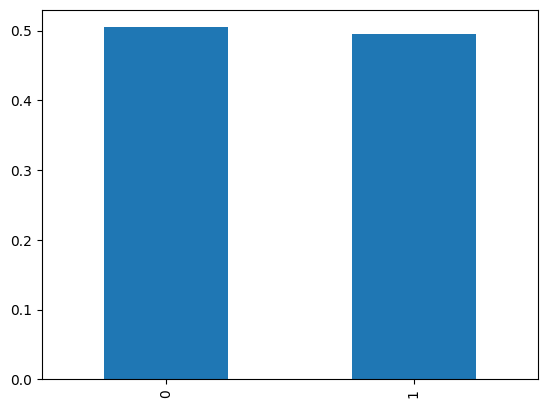

In [25]:
data["is_depression"].value_counts(normalize=True).plot(kind="bar")

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split




# Parameters for text tokenization
vocab_size = 10000  # Size of the vocabulary
embedding_dim = 16  # Dimensions for word embedding
max_length = 100  # Maximum length for sequences
trunc_type = 'post'  # Truncate sequences exceeding max_length from the end
padding_type = 'post'  # Pad sequences shorter than max_length from the end
oov_tok = "<OOV>"  # Token for out-of-vocabulary words

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(data['clean_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['clean_text'])

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['is_depression'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6184, 100), (1547, 100), (6184,), (1547,))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D

# Initialize the model
model = Sequential()

# Add the Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# Add an LSTM layer
model.add(LSTM(64, return_sequences=True))

# Add a GlobalMaxPooling layer
model.add(GlobalMaxPooling1D())

# Add the output Dense layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           20736     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 180801 (706.25 KB)
Trainable params: 180801 (706.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5
194/194 [==============================] - 20s 78ms/step - loss: 0.4285 - accuracy: 0.8247 - val_loss: 0.3166 - val_accuracy: 0.8610
Epoch 2/5
194/194 [==============================] - 15s 75ms/step - loss: 0.4102 - accuracy: 0.8376 - val_loss: 0.4032 - val_accuracy: 0.7925
Epoch 3/5
194/194 [==============================] - 15s 75ms/step - loss: 0.2473 - accuracy: 0.9009 - val_loss: 0.2491 - val_accuracy: 0.8940
Epoch 4/5
194/194 [==============================] - 15s 79ms/step - loss: 0.1305 - accuracy: 0.9502 - val_loss: 0.1759 - val_accuracy: 0.9198
Epoch 5/5
194/194 [==============================] - 15s 75ms/step - loss: 0.1628 - accuracy: 0.9581 - val_loss: 0.2504 - val_accuracy: 0.9276


49/49 [==============================] - 4s 42ms/step


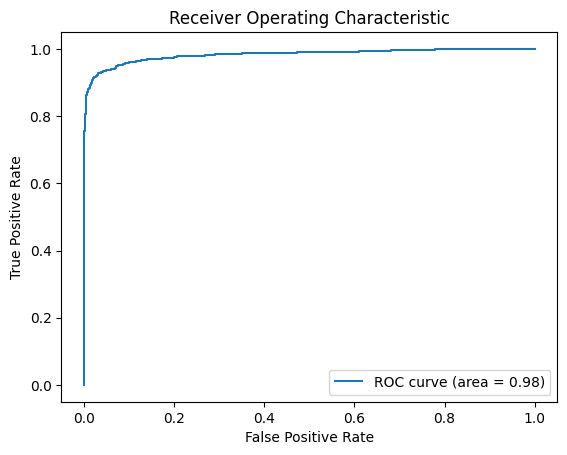

In [31]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


49/49 [==============================] - 3s 66ms/step


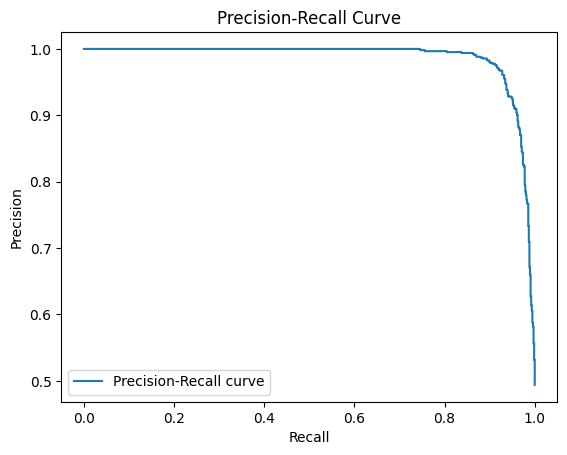

In [32]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test).ravel())

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
